# 決策樹

In [12]:
from sklearn.tree import DecisionTreeClassifier
feature = [[1,32],[1,25],[0,26],[1,19],[0,28],[0,18],[1,17],[0,22],[1,29],[0,30]]
target = [1,1,0,1,0,1,1,0,1,0]

tree = DecisionTreeClassifier(criterion='entropy') # 使用scikit-learn 的決策樹物件，使用entropy作為分類標準
tree.fit(feature, target) # 使用創造的資料生成決策樹

DecisionTreeClassifier(criterion='entropy')

In [11]:
### 測試結果
prediction = tree.predict(feature)
print(prediction) # 用feature data去預測結果，完全相符

[1 1 0 1 0 1 1 0 1 0]


In [9]:
from sklearn.tree import export_graphviz
export_graphviz(tree,out_file=r'C:\Users\yifun\Desktop\python_code\hero.dot',
        feature_names=['gender','age'],
        class_names=['Captain America','Iron Man'])

想看Decision Tree過程:
1. 開啟Anconda Prompt
2. 用cd跳移動到該檔案生成的資料夾位置
3. 輸入指令:  dot -Tpdf hero.dot -o hero.pdf
4. 去該資料夾下開啟"hero.pdf" 即可看到 

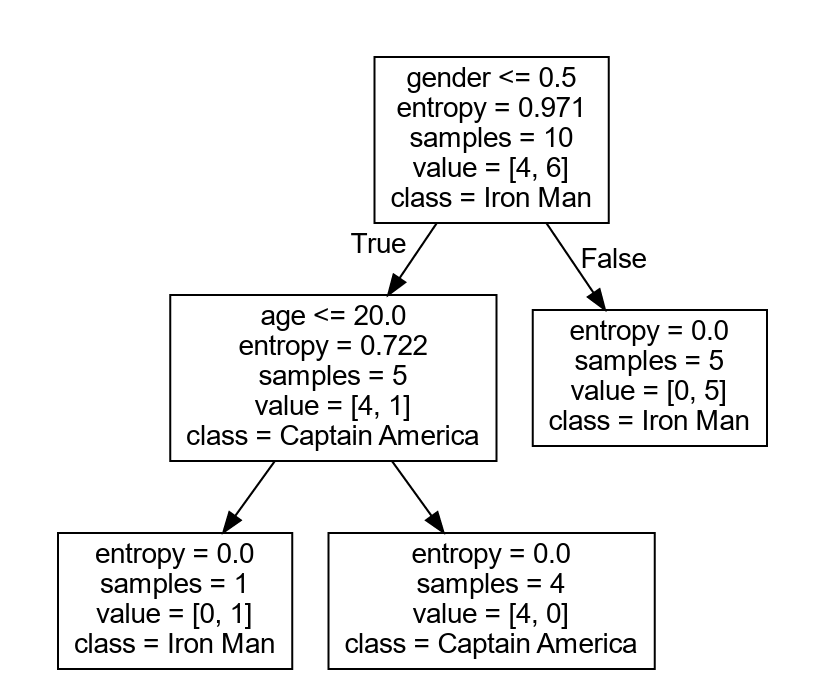

# 隨機森林

In [15]:
from sklearn import datasets
wine_data = datasets.load_wine()

print("資料維度: ",wine_data.data.shape) # 共有178筆，共有13個欄位(特徵)
print('特徵名稱: ',wine_data.feature_names) # 13個特徵(欄位)名稱
print("類別名稱: ",wine_data.target_names)  # 該13個特徵(欄位又可分為3個類別

資料維度:  (178, 13)
特徵名稱:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
類別名稱:  ['class_0' 'class_1' 'class_2']


為了讓我們之後能評估分類器的效果, 所以要先將資料分割成訓練資料和測試資料, 我們會使用訓練資料來生成決策樹和隨機森林, 並用測試資料來測試分類效果

In [27]:
from sklearn.model_selection import train_test_split   
train_feature, test_feature, train_target, test_target = train_test_split(wine_data.data,wine_data.target, test_size=0.3)
                                                                         # 總資料特徵         總資料目標     使用30%資料作為測試

In [28]:
# 用分割好的資料先建立Decision Tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', max_depth = 4) # 限制Decision Tree最大深度為4層，避免樹生長過大
tree.fit(train_feature, train_target)  

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [29]:
# 再建立一個Random Forest
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='entropy',n_estimators = 10,max_depth = 4)
                                         #    代表一個森林中有幾棵樹   限制Decision Tree最大深度為4層
forest.fit(train_feature, train_target)

RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=10)

最後我們利用分類器的 score() 函式來評估效果, 此函式要傳入特徵資料和目標, 它會將特徵資料進行分類, 並比較與結果的差異, 然後輸出分類的準確率, 以下我們分別評估決策樹和隨機森林的準確率：

In [31]:
accuracy_tree = tree.score(test_feature,test_target)
accuracy_forest = forest.score(test_feature,test_target)

print("Decision Tree準確度:", accuracy_tree)
print("Random Forest準確度:", accuracy_forest) 

# 從輸出可以看到隨機森林的效果明顯要優於決策樹

Decision Tree準確度: 0.8518518518518519
Random Forest準確度: 0.8888888888888888
